# Multidimensional Array Exercise

In this exercise, you will apply the principles of using multidimensional arrays to estimate global mean temperature from a gridded dataset, accounting for the fact that grid cells become smaller at the poles.

In a dataset with evenly spaced latitude and longitude values, the meridians converge at the poles, making the cells smaller.  The area of the cells is proportional to the cosine of the latitude $\theta$ (in radians):

$$ \Delta A = R_{\oplus}^2 \Delta \theta \Delta \phi \cdot \cos(\theta) $$
$$ \Delta A \propto \cos(\theta)$$

Therefore, when calculating the global average of a quantity (like temperature), the values need to be weighted by $\cos(\theta)$.

**Goal**: correctly calculate a timeseries of global mean temperature from the dataset below

Instructions:

1. execute the cell below to download the dataset (this is the one we used to make sound in the first class)
1. the cell includes code to extract the latitude values (in degrees; `lat`) and the temperature field `temp_3d` as numpy arrays
1. calculate and plot a timeseries of global mean temperature, using the $cos(\theta)$ weighting

In [1]:
""" Download the nc data file """
# set the year we want to download
year = 1983
# set the URL for the NCEP/DOE Reanalysis 2 data file
url = f"https://psl.noaa.gov/thredds/fileServer/Datasets/ncep.reanalysis2/gaussian_grid/air.2m.gauss.{year}.nc"

# set the name of the file we want to download to
output_file = f"air.2m.gauss.{year}.nc"

# download the data file
# NOTE: the use of ! at the beginning of the line indicates that this is a shell command, not python code -- though it does use some python code.  How, why?
# check first if the file exists; don't re-download if it does
import os
if not os.path.exists(output_file):
    ! curl --output {output_file} {url}


In [2]:
""" Read in the data """
# (a side note for anyone familiar with xarray: you might ask why I don't use xarray to directly open the file from the URL (or the related OpenDAP URL)?
# The reason is that it takes several minutes to open this 55 MB file, whereas directly downloading it takes only a couple seconds!)

import xarray as xr

# open the dataset using xarray
temp_ds = xr.open_dataset(output_file, chunks = -1)

# get the latitude and temperature values as numpy arrays
lat = temp_ds.lat.values
temp_3d = temp_ds.air.values

# also get the time array
time = temp_ds.time.values

In [3]:
""" explore the arrays """
# print type, shape and values
print(type(lat))
print(lat.shape)
print(lat)
print(type(temp_3d))
print(temp_3d.shape)
print(temp_3d)

<class 'numpy.ndarray'>
(94,)
[ 88.542     86.6531    84.7532    82.8508    80.9473    79.0435
  77.1394    75.2351    73.3307    71.4262    69.5217    67.6171
  65.7125    63.8079    61.9033    59.9986    58.0939    56.1893
  54.2846    52.3799    50.4752    48.5705    46.6658    44.7611
  42.8564    40.9517    39.047     37.1422    35.2375    33.3328
  31.4281    29.5234    27.6186    25.7139    23.8092    21.9044
  19.9997    18.095     16.1902    14.2855    12.3808    10.47604
   8.57131    6.66657    4.76184    2.8571     0.952368  -0.952368
  -2.8571    -4.76184   -6.66657   -8.57131  -10.47604  -12.3808
 -14.2855   -16.1902   -18.095    -19.9997   -21.9044   -23.8092
 -25.7139   -27.6186   -29.5234   -31.4281   -33.3328   -35.2375
 -37.1422   -39.047    -40.9517   -42.8564   -44.7611   -46.6658
 -48.5705   -50.4752   -52.3799   -54.2846   -56.1893   -58.0939
 -59.9986   -61.9033   -63.8079   -65.7125   -67.6171   -69.5217
 -71.4262   -73.3307   -75.2351   -77.1394   -79.0435   -

In [4]:
""" Reduce the dimentionality of the array """
# remove the unnecessary dimension of size 1
temp_3d = temp_3d.squeeze()
print(temp_3d.shape)

(1460, 94, 192)


In [5]:
""" import libraries needed """
import numpy as np
import matplotlib.pyplot as plt

In [6]:
""" Calculate the weights """
# calculate the cosine of all latitude values
weight_factors = np.cos(np.deg2rad(lat))
print(weight_factors.shape)
print(weight_factors)

# convert the cos values to weights
weight_factors = weight_factors/weight_factors.sum()
print(weight_factors.shape)
print(weight_factors)

(94,)
[0.02544422 0.0583812  0.09144609 0.12445362 0.15734279 0.19006358
 0.22257979 0.25485343 0.28684726 0.31852594 0.3498527  0.38079438
 0.41131556 0.44138214 0.47096106 0.5000211  0.5285287  0.5564508
 0.5837595  0.610423   0.63641214 0.661698   0.68625265 0.710049
 0.7330607  0.75526243 0.77662945 0.79713947 0.81676745 0.8354929
 0.85329515 0.8701545  0.88605314 0.9009718  0.9148949  0.9278076
 0.9396944  0.95054287 0.9603414  0.9690782  0.9767442  0.983331
 0.98883116 0.99323857 0.99654835 0.99875695 0.99986184 0.99986184
 0.99875695 0.99654835 0.99323857 0.98883116 0.983331   0.9767442
 0.9690782  0.9603414  0.95054287 0.9396944  0.9278076  0.9148949
 0.9009718  0.88605314 0.8701545  0.85329515 0.8354929  0.81676745
 0.79713947 0.77662945 0.75526243 0.7330607  0.710049   0.68625265
 0.661698   0.63641214 0.610423   0.5837595  0.5564508  0.5285287
 0.5000211  0.47096106 0.44138214 0.41131556 0.38079438 0.3498527
 0.31852594 0.28684726 0.25485343 0.22257979 0.19006358 0.15734279


In [7]:
# add more dimensions to the weights so that it is conformant with the temp array
weight_factors_3d = weight_factors[np.newaxis, :, np.newaxis]
print(weight_factors_3d.shape)
print(weight_factors_3d)

(1, 94, 1)
[[[0.00042291]
  [0.00097036]
  [0.00151993]
  [0.00206855]
  [0.0026152 ]
  [0.00315906]
  [0.00369951]
  [0.00423593]
  [0.0047677 ]
  [0.00529424]
  [0.00581492]
  [0.0063292 ]
  [0.0068365 ]
  [0.00733623]
  [0.00782787]
  [0.00831088]
  [0.0087847 ]
  [0.0092488 ]
  [0.0097027 ]
  [0.01014587]
  [0.01057784]
  [0.01099812]
  [0.01140624]
  [0.01180176]
  [0.01218424]
  [0.01255326]
  [0.0129084 ]
  [0.01324929]
  [0.01357553]
  [0.01388677]
  [0.01418266]
  [0.01446288]
  [0.01472713]
  [0.0149751 ]
  [0.01520651]
  [0.01542114]
  [0.01561871]
  [0.01579902]
  [0.01596188]
  [0.0161071 ]
  [0.01623451]
  [0.01634399]
  [0.01643541]
  [0.01650867]
  [0.01656368]
  [0.01660039]
  [0.01661875]
  [0.01661875]
  [0.01660039]
  [0.01656368]
  [0.01650867]
  [0.01643541]
  [0.01634399]
  [0.01623451]
  [0.0161071 ]
  [0.01596188]
  [0.01579902]
  [0.01561871]
  [0.01542114]
  [0.01520651]
  [0.0149751 ]
  [0.01472713]
  [0.01446288]
  [0.01418266]
  [0.01388677]
  [0.01357553]

In [8]:
# calculate the weighted temperature across all dimensions
weighted_temp_3d = weight_factors_3d*temp_3d
print(weighted_temp_3d.shape)
print(weighted_temp_3d)

(1460, 94, 192)
[[[0.10620108 0.10617571 0.1061588  ... 0.10624338 0.10622646 0.10620955]
  [0.24777092 0.24777092 0.24779034 ... 0.24768358 0.2477127  0.24773212]
  [0.39433068 0.3946651  0.39492348 ... 0.39276516 0.39337313 0.3938899 ]
  ...
  [0.38267285 0.38221684 0.38174567 ... 0.38407117 0.3836     0.3831288 ]
  [0.2417159  0.24150242 0.24128895 ... 0.24236605 0.24214284 0.24192937]
  [0.10456865 0.10452213 0.10447984 ... 0.10470399 0.10465746 0.10461095]]

 [[0.10527491 0.10525377 0.10526223 ... 0.10527915 0.10526646 0.10526223]
  [0.24682967 0.24681026 0.24678116 ... 0.24680056 0.24681997 0.24682967]
  [0.39537945 0.3952123  0.39498425 ... 0.39580503 0.395729   0.39557704]
  ...
  [0.38603187 0.3856519  0.3852567  ... 0.3872174  0.38682222 0.38642707]
  [0.24324906 0.2430647  0.24289003 ... 0.24379246 0.24360809 0.24343342]
  [0.1047928  0.10475473 0.10471667 ... 0.10491121 0.10487315 0.10483509]]

 [[0.10489007 0.10489007 0.10491121 ... 0.10483932 0.10484777 0.10486046]
  [0.2

In [9]:
# calculate the weighted average over latitudes
weighted_temp_2d = np.sum(weighted_temp_3d, axis=1)
print(weighted_temp_2d.shape)
print(weighted_temp_2d)

(1460, 192)
[[285.4794  285.4778  285.32477 ... 285.73022 285.59146 285.44934]
 [287.4783  287.54913 287.37683 ... 287.4504  287.40332 287.56284]
 [287.50998 287.50485 287.20938 ... 287.7558  287.54666 287.59018]
 ...
 [287.3301  287.35892 287.3933  ... 287.0995  287.03937 287.19995]
 [287.1726  287.20056 286.9919  ... 287.44528 287.27505 287.2125 ]
 [285.16855 285.3073  285.31146 ... 285.23917 285.28757 285.215  ]]


In [10]:
# calculate the average over longitudes
weighted_temp_global = np.mean(weighted_temp_2d, axis=1)
print(weighted_temp_global.shape)
print(weighted_temp_global)

(1460,)
[285.7089  286.12994 285.9769  ... 285.921   285.55893 285.22366]


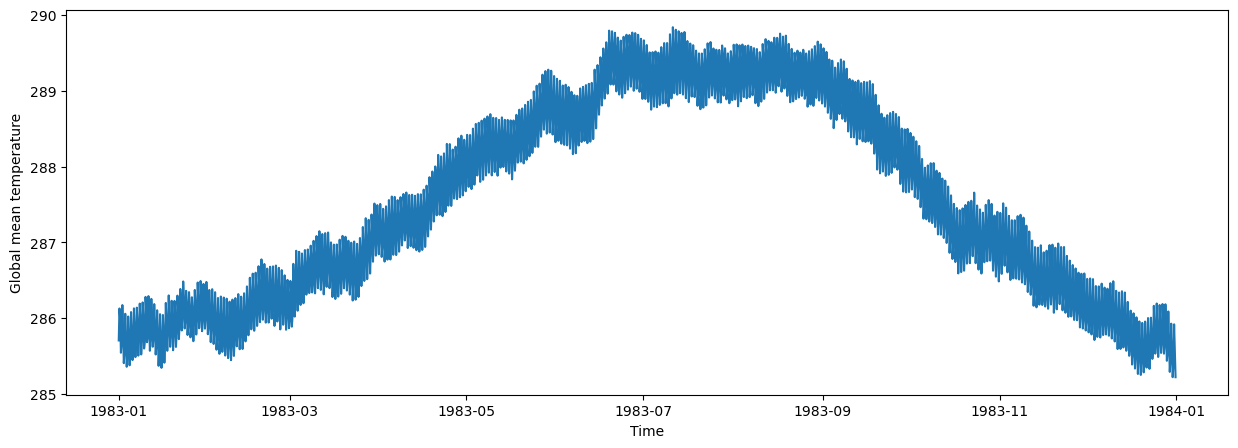

In [11]:
# plot the global mean tempreature over time
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(time, weighted_temp_global)
ax.set_xlabel("Time")
ax.set_ylabel("Global mean temperature")
plt.show()